In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
df = pd.read_csv('I:/Fintech Project Data/PaySim/PS_20174392719_1491204439457_log.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

isFraud
0    6354407
1       8213
Name: count, dtype: int64


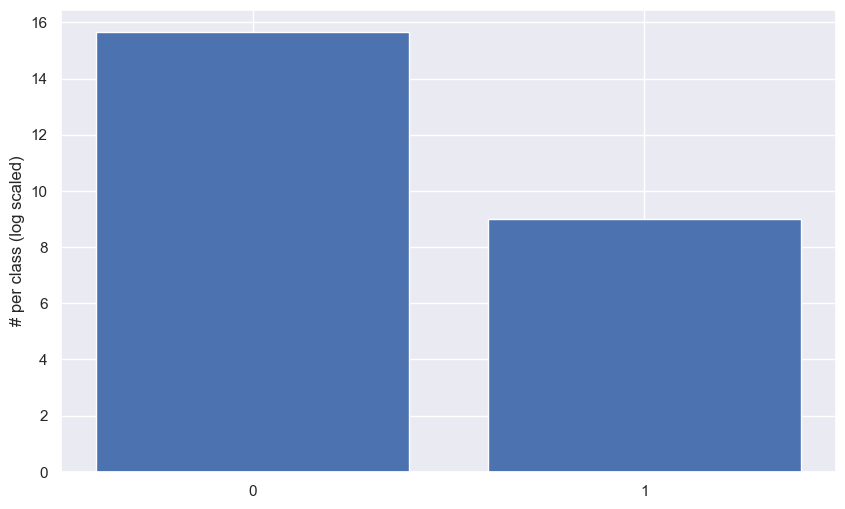

In [5]:
x = df['isFraud'].value_counts()
print(x)

plt.figure(figsize = (10,6))
plt.bar(x.index.astype(str), np.log(x.values))
plt.ylabel('# per class (log scaled)');

In [6]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [7]:
data = df.drop(['nameOrig','nameDest','isFlaggedFraud'], axis = 1)
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


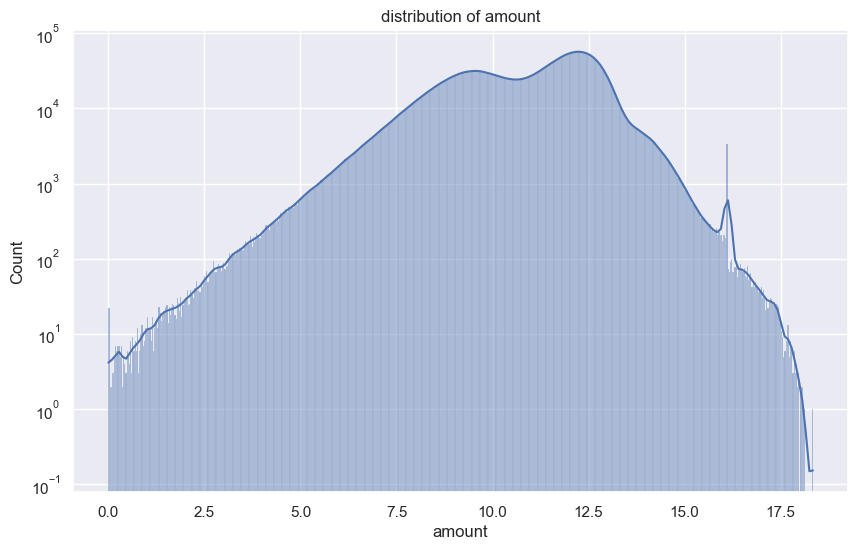

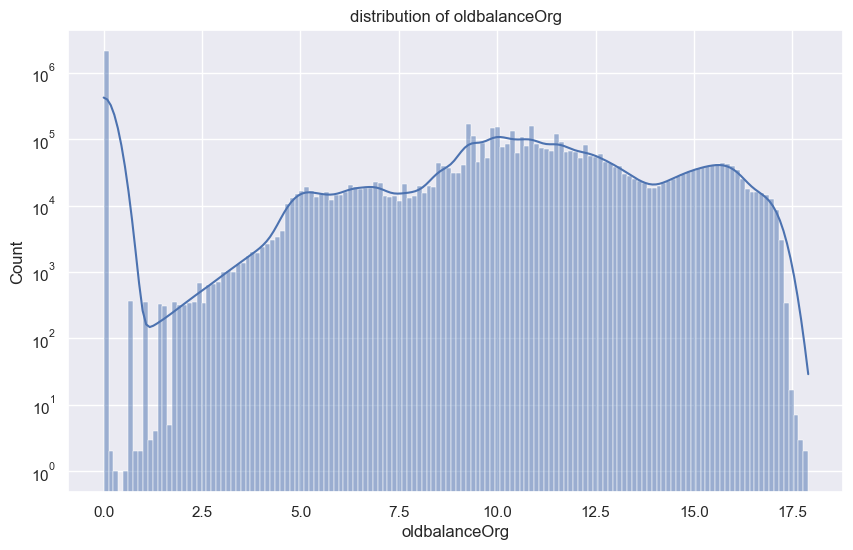

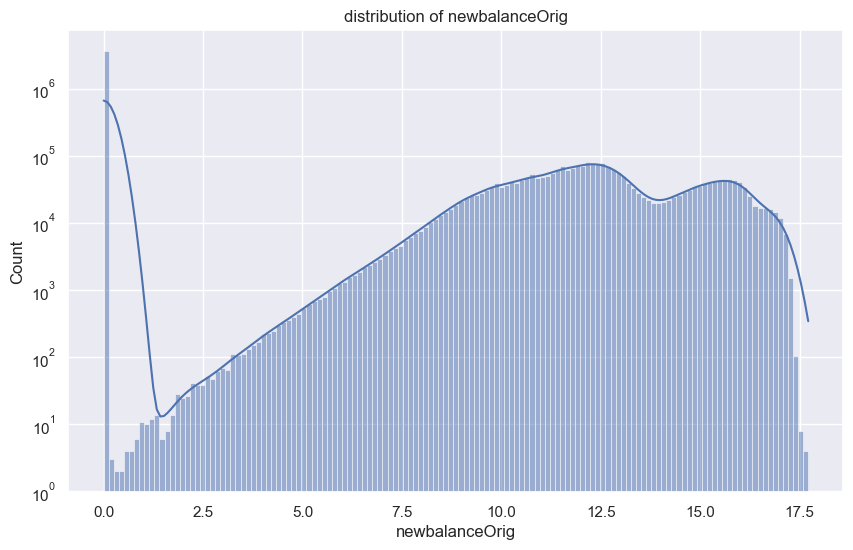

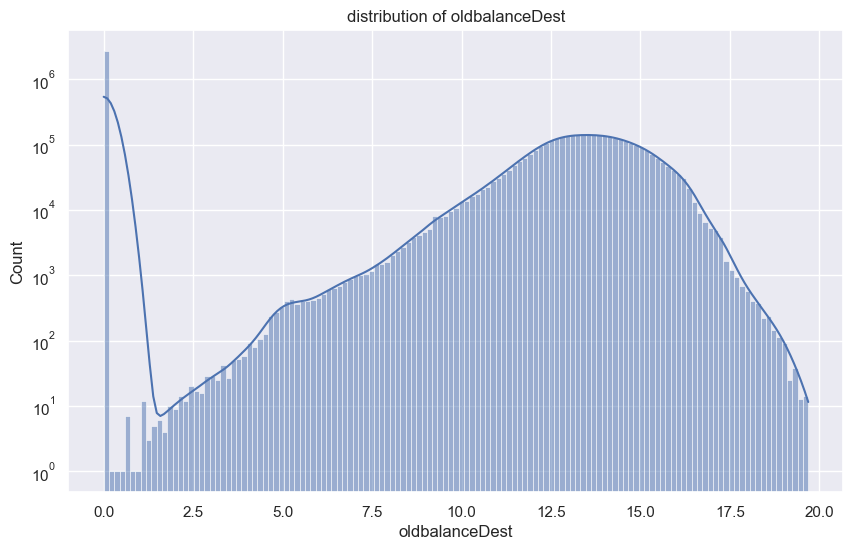

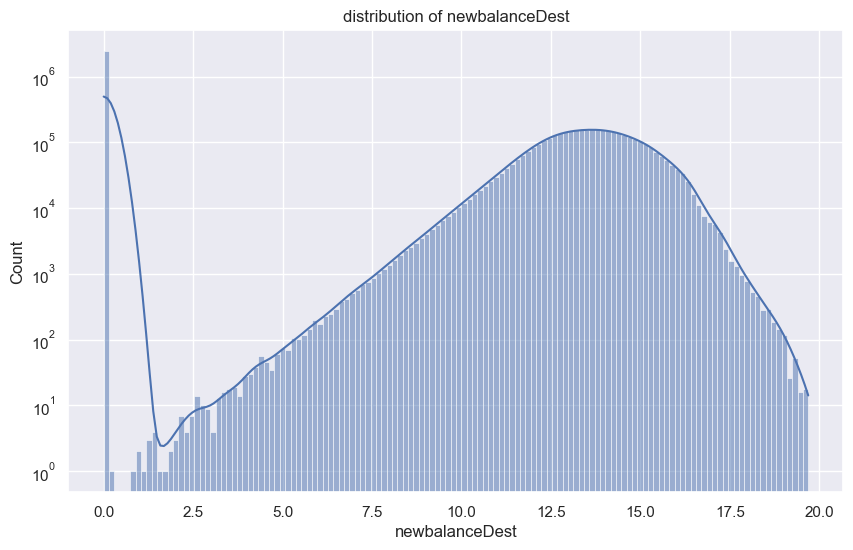

In [8]:
num_feat = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

for feat in num_feat:
    plt.figure(figsize = (10, 6))
    sns.histplot(np.log1p(data[feat]), kde  = True)
    plt.yscale('log')
    plt.title(f'distribution of {feat}')
    plt.ylabel('Count')

### Groupby explorations

In [9]:
df.groupby('isFraud')['amount'].mean()

isFraud
0    1.781970e+05
1    1.467967e+06
Name: amount, dtype: float64

In [10]:
df.groupby('isFraud')['amount'].max()

isFraud
0    92445516.64
1    10000000.00
Name: amount, dtype: float64

In [11]:
df.groupby('isFraud')['amount'].std()

isFraud
0    5.962370e+05
1    2.404253e+06
Name: amount, dtype: float64

Both the mean and variance of fradulent transactions is higher than that of regular/non-fraud transactions

C:\Users\Sadat Iqbal\AppData\Local\Temp\ipykernel_8696\1259589592.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log1p(data[data['isFraud']==1]['amount']), kde = True)


Text(0.5, 1.0, 'Distribution of fraudulent transactions')

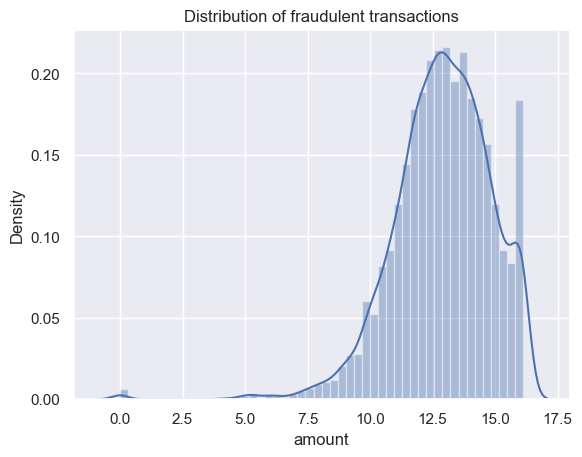

In [12]:
sns.distplot(np.log1p(data[data['isFraud']==1]['amount']), kde = True)
plt.title('Distribution of fraudulent transactions')

C:\Users\Sadat Iqbal\AppData\Local\Temp\ipykernel_8696\2138136434.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log1p(data[data['isFraud']==0]['amount']), kde = True)


Text(0.5, 1.0, 'Distribution of non-fraud transactions')

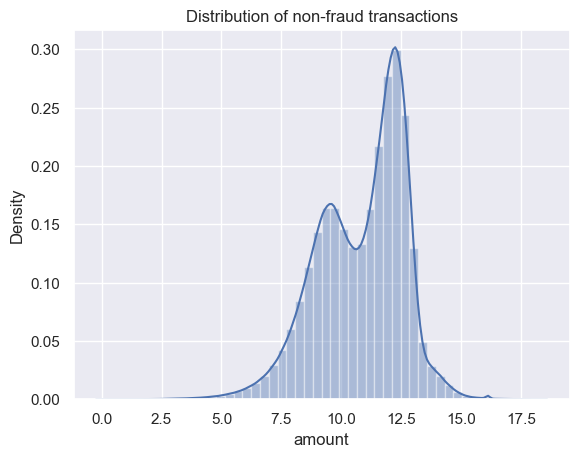

In [13]:
sns.distplot(np.log1p(data[data['isFraud']==0]['amount']), kde = True)
plt.title('Distribution of non-fraud transactions')

In [14]:
np.unique(data['type'])

array(['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER'],
      dtype=object)

In [15]:
df[df['isFraud']==1]['type'].value_counts()

type
CASH_OUT    4116
TRANSFER    4097
Name: count, dtype: int64

Not all transaction channels include frauds. Only `CASH_OUT` and `TRANSFER` methods include them

Text(0, 0.5, 'Count')

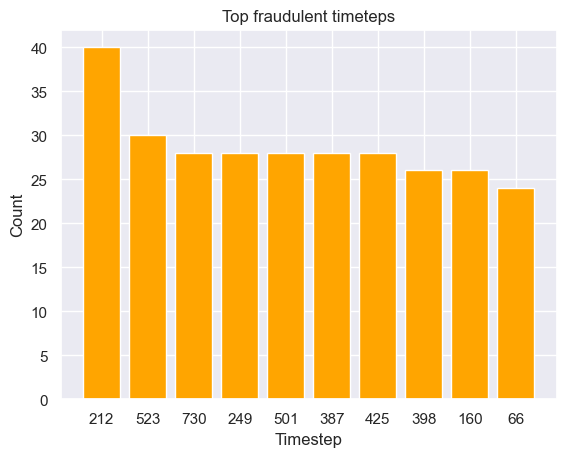

In [16]:
top_k = 10

fraud_timesteps = data[data['isFraud']==1]['step'].value_counts().sort_values(ascending = False)
top_fraud_timesteps = fraud_timesteps.head(top_k)
plt.bar(top_fraud_timesteps.index.astype(str), top_fraud_timesteps.values, color = 'orange')
plt.title('Top fraudulent timeteps')
plt.xlabel('Timestep')
plt.ylabel('Count')

* Timestep 212 requires most monitoring as it had 40 fraudulent transactions

### Correlation analysis

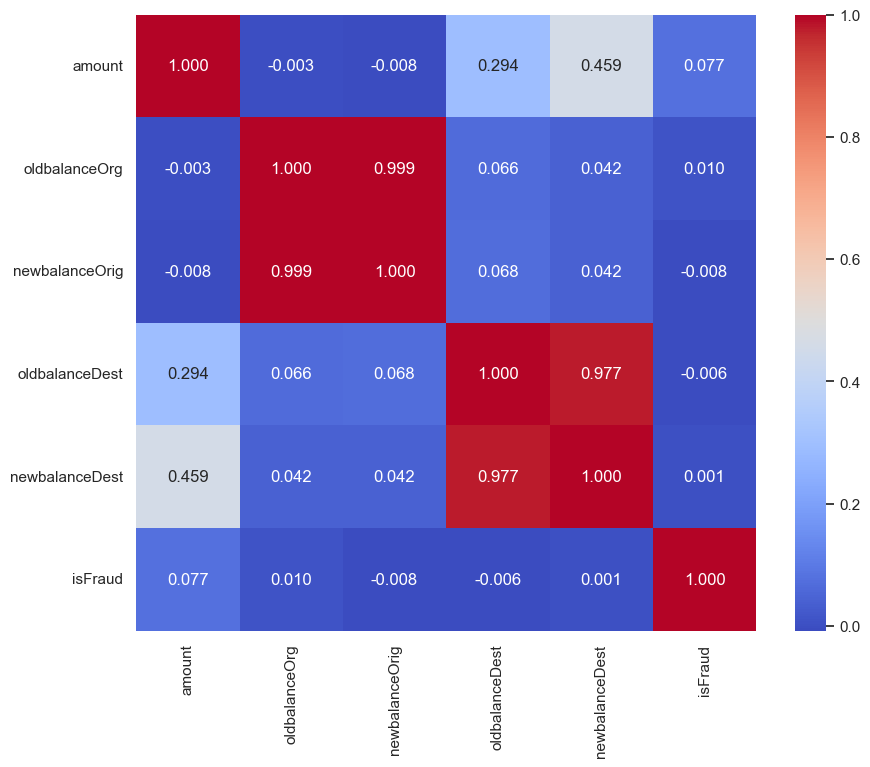

In [17]:
correl = data[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']].corr()

plt.figure(figsize = (10,8))
sns.heatmap(correl, annot = True, fmt = '.3f', cmap = 'coolwarm')
plt.show();

### One Hot Encoding Categorical Columns

In [18]:
data.head() 

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [19]:
X = data.drop(['step','isFraud'], axis = 1)
y = data['isFraud']

In [20]:
type_ohe = pd.get_dummies(X['type'], drop_first=True).astype(int)
type_ohe.head()

,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,1,0
1,0,0,1,0
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0


In [21]:
X = X.drop('type', axis = 1)
X = pd.concat([X, type_ohe], axis = 1)
X.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,9839.64,170136.0,160296.36,0.0,0.0,0,0,1,0
1,1864.28,21249.0,19384.72,0.0,0.0,0,0,1,0
2,181.00,181.0,0.00,0.0,0.0,0,0,0,1
3,181.00,181.0,0.00,21182.0,0.0,1,0,0,0
4,11668.14,41554.0,29885.86,0.0,0.0,0,0,1,0


### Splitting the data

In [22]:
np.random.seed(42)

from sklearn.model_selection import StratifiedShuffleSplit
sss_1 = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

for train_idx, temp_idx in sss_1.split(X,y):
    X_train, X_temp = X.iloc[train_idx], X.iloc[temp_idx]
    y_train, y_temp = y.iloc[train_idx], y.iloc[temp_idx]

X_train.shape, X_temp.shape 

((4453834, 9), (1908786, 9))

In [23]:
np.random.seed(42)

sss_2 = StratifiedShuffleSplit(n_splits=1,test_size=0.5,random_state=42)

for val_idx,test_idx in sss_2.split(X_temp,y_temp):
    X_val, X_test = X_temp.iloc[val_idx],X_temp.iloc[test_idx]
    y_val, y_test = y_temp.iloc[val_idx], y_temp.iloc[test_idx]

X_val.shape, X_test.shape

((954393, 9), (954393, 9))

# ML Modelling (Supervised Learning)

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [25]:
import lightgbm as lgb


def fit_and_evaluate_model(
    model,
    X_train, y_train,
    X_test, y_test,
    X_val=None, y_val=None
):
    model_ins = model
    model_name = model_ins.__class__.__name__

    # ---- TabNet needs NumPy ----
    if model_name == "TabNetClassifier":
        X_tr = X_train.to_numpy()
        y_tr = y_train.to_numpy()
        X_te = X_test.to_numpy()
        y_te = y_test.to_numpy()
        X_vl = X_val.to_numpy() if X_val is not None else None
        y_vl = y_val.to_numpy() if y_val is not None else None
    else:
        X_tr, y_tr = X_train, y_train
        X_te, y_te = X_test, y_test
        X_vl, y_vl = X_val, y_val

    # ---- FIT with early stopping ----
    if model_name == "XGBClassifier":
        model_ins.fit(
            X_tr, y_tr,
            eval_set=[(X_vl, y_vl)],
            verbose=False
        )

    elif model_name == "LGBMClassifier":
        model_ins.fit(
            X_tr, y_tr,
            eval_set=[(X_vl, y_vl)],
            callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=False),
                      lgb.log_evaluation(period = 0)],
        )

    elif model_name == "CatBoostClassifier":
        model_ins.fit(
            X_tr, y_tr,
            eval_set=(X_vl, y_vl),
            early_stopping_rounds=50,
            verbose=False
        )

    elif model_name == "TabNetClassifier":
        model_ins.fit(
            X_tr, y_tr,
            eval_set=[(X_vl, y_vl)],
            patience=50,          # <-- your request
            max_epochs=300
        )

    else:
        # Logistic Regression, RF, ExtraTrees
        model_ins.fit(X_tr, y_tr)

    # ---- TRAIN METRICS ----
    y_pred_train = model_ins.predict(X_tr)
    y_score_train = model_ins.predict_proba(X_tr)[:, 1]

    train_res_df = pd.DataFrame({
        'Training Accuracy': [accuracy_score(y_tr, y_pred_train)],
        'Training Precision': [precision_score(y_tr, y_pred_train)],
        'Training Recall': [recall_score(y_tr, y_pred_train)],
        'Training F1 Score': [f1_score(y_tr, y_pred_train)],
        'Training ROC AUC Score': [roc_auc_score(y_tr, y_score_train)]
    })

    # ---- TEST METRICS ----
    y_pred_test = model_ins.predict(X_te)
    y_score_test = model_ins.predict_proba(X_te)[:, 1]

    test_res_df = pd.DataFrame({
        'Testing Accuracy': [accuracy_score(y_te, y_pred_test)],
        'Testing Precision': [precision_score(y_te, y_pred_test)],
        'Testing Recall': [recall_score(y_te, y_pred_test)],
        'Testing F1 Score': [f1_score(y_te, y_pred_test)],
        'Testing ROC AUC Score': [roc_auc_score(y_te, y_score_test)]
    })

    return y_pred_test, train_res_df, test_res_df


In [26]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(
    y_true,
    y_pred,
    labels=None,
    normalize=False,
    cmap="Blues",
    title="Confusion Matrix"
):
    
    if labels is None:
        labels = np.unique(np.concatenate([y_true, y_pred]))

    cm = confusion_matrix(y_true, y_pred, labels=labels)

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1, keepdims=True)
        fmt = ".2f"
    else:
        fmt = "d"

    plt.figure(figsize=(6, 5))
    sns.heatmap(
        cm,
        annot=True,
        fmt=fmt,
        cmap=cmap,
        xticklabels=labels,
        yticklabels=labels,
        cbar=False
    )

    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.title(title)
    plt.tight_layout()
    plt.show()

### Logistic Regression

In [27]:
np.random.seed(42)

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=5000, class_weight='balanced', random_state=42)

lr_pred_test, lr_train_df, lr_test_df = fit_and_evaluate_model(lr,
                      X_train=X_train,
                      y_train=y_train,
                      X_test=X_test,
                      y_test=y_test)

In [28]:
lr_train_df

,Training Accuracy,Training Precision,Training Recall,Training F1 Score,Training ROC AUC Score
0,0.949322,0.023178,0.929901,0.045228,0.9883


In [29]:
lr_test_df

,Testing Accuracy,Testing Precision,Testing Recall,Testing F1 Score,Testing ROC AUC Score
0,0.949521,0.02312,0.923701,0.045111,0.986964


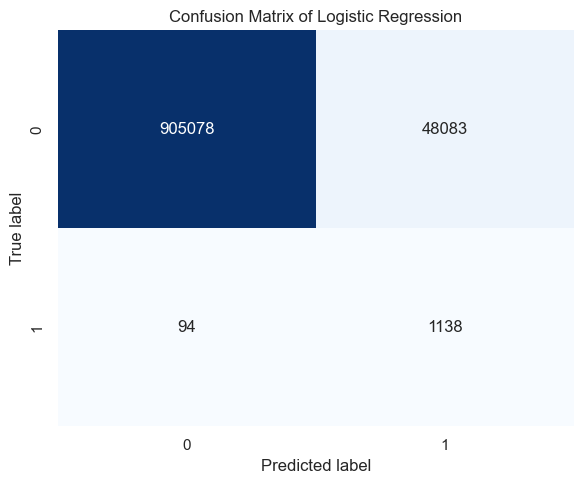

In [30]:
plot_confusion_matrix(y_test, lr_pred_test, title='Confusion Matrix of Logistic Regression')

### Naive Bayes

In [31]:
np.random.seed(42)

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB(var_smoothing=1e-10)

nb_pred_test, nb_train_df, nb_test_df = fit_and_evaluate_model(nb,
                      X_train=X_train,
                      y_train=y_train,
                      X_test=X_test,
                      y_test=y_test)

In [32]:
nb_train_df

,Training Accuracy,Training Precision,Training Recall,Training F1 Score,Training ROC AUC Score
0,0.991919,0.030519,0.170986,0.051794,0.798108


In [33]:
nb_test_df

,Testing Accuracy,Testing Precision,Testing Recall,Testing F1 Score,Testing ROC AUC Score
0,0.99194,0.027916,0.155032,0.047312,0.790004


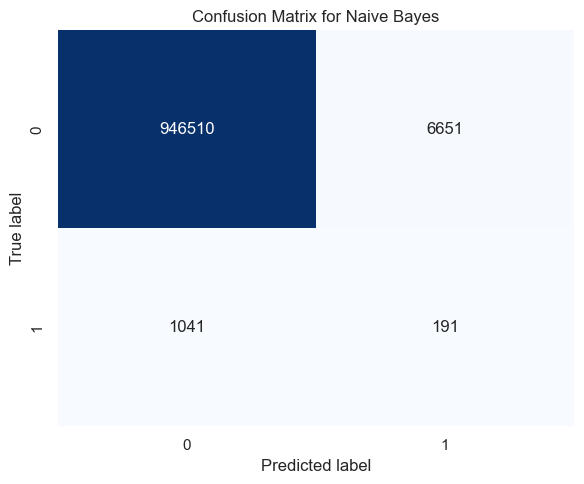

In [34]:
plot_confusion_matrix(y_test, nb_pred_test, title = 'Confusion Matrix for Naive Bayes')

* Naive Assumptions of Naive Bayes doesn't work here as quite a few features are extremely correlated

### Random Forest

In [35]:
np.random.seed(42)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200,
                           criterion='gini',
                           n_jobs=-1,
                           class_weight='balanced')

rf_pred_test, rf_train_df, rf_test_df = fit_and_evaluate_model(rf,
                      X_train=X_train,
                      y_train=y_train,
                      X_test=X_test,
                      y_test=y_test)

In [36]:
rf_train_df

,Training Accuracy,Training Precision,Training Recall,Training F1 Score,Training ROC AUC Score
0,1.0,1.0,1.0,1.0,1.0


In [37]:
rf_test_df

,Testing Accuracy,Testing Precision,Testing Recall,Testing F1 Score,Testing ROC AUC Score
0,0.999668,0.965412,0.770292,0.856885,0.996627


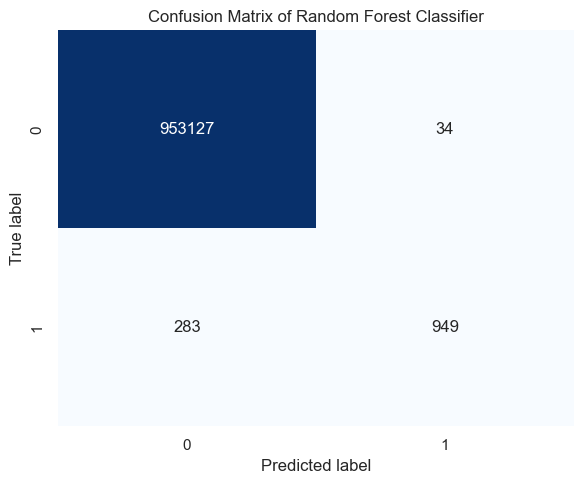

In [38]:
plot_confusion_matrix(y_test, rf_pred_test, title='Confusion Matrix of Random Forest Classifier')

### Extra Trees

In [39]:
np.random.seed(42)
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_estimators=200,
                         n_jobs=-1,
                         class_weight='balanced')
et_pred_test, et_train_df, et_test_df = fit_and_evaluate_model(et,
                      X_train=X_train,
                      y_train=y_train,
                      X_test=X_test,
                      y_test=y_test)

In [40]:
et_train_df

,Training Accuracy,Training Precision,Training Recall,Training F1 Score,Training ROC AUC Score
0,1.0,1.0,1.0,1.0,1.0


In [41]:
et_test_df

,Testing Accuracy,Testing Precision,Testing Recall,Testing F1 Score,Testing ROC AUC Score
0,0.999686,0.96507,0.784903,0.865712,0.996158


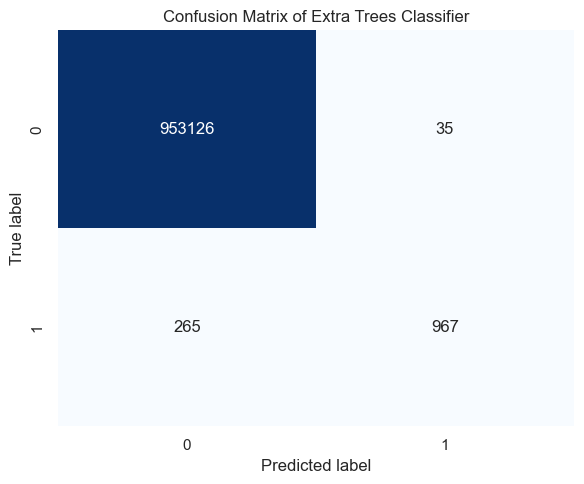

In [42]:
plot_confusion_matrix(y_test, et_pred_test, title='Confusion Matrix of Extra Trees Classifier')

### XGBoost

In [43]:
from xgboost import XGBClassifier

In [44]:
np.random.seed(42)

xgb = XGBClassifier(n_estimators = 1000,
                   learning_rate = 0.05,
                   max_depth = 5,
                   verbosity = 0,
                   eval_metric = 'aucpr',
                    early_stopping_rounds = 50)

xgb_pred_test, xgb_train_df, xgb_test_df = fit_and_evaluate_model(xgb,
                                                                  X_train=X_train,
                                                                  y_train=y_train,
                                                                  X_test=X_test,
                                                                  y_test=y_test,
                                                                 X_val=X_val,
                                                                 y_val=y_val)

In [45]:
xgb_train_df

,Training Accuracy,Training Precision,Training Recall,Training F1 Score,Training ROC AUC Score
0,0.999705,0.979883,0.787963,0.873506,0.999933


In [46]:
xgb_test_df

,Testing Accuracy,Testing Precision,Testing Recall,Testing F1 Score,Testing ROC AUC Score
0,0.999663,0.970041,0.762175,0.853636,0.999464


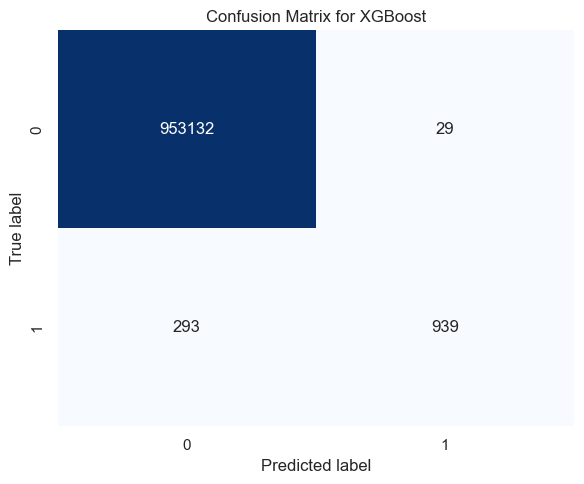

In [47]:
plot_confusion_matrix(y_test, xgb_pred_test, title="Confusion Matrix for XGBoost")

### CatBoost

In [48]:
from catboost import CatBoostClassifier

In [49]:
np.random.seed(42)

cb = CatBoostClassifier(iterations=1000,
                       learning_rate=0.05,
                       depth = 5,
                       verbose=False,
                       early_stopping_rounds=50)

cb_pred_test, cb_train_df, cb_test_df = fit_and_evaluate_model(xgb,
                                                                  X_train=X_train,
                                                                  y_train=y_train,
                                                                  X_test=X_test,
                                                                  y_test=y_test,
                                                                 X_val=X_val,
                                                                 y_val=y_val)

In [50]:
cb_train_df

,Training Accuracy,Training Precision,Training Recall,Training F1 Score,Training ROC AUC Score
0,0.999705,0.979883,0.787963,0.873506,0.999933


In [51]:
cb_test_df

,Testing Accuracy,Testing Precision,Testing Recall,Testing F1 Score,Testing ROC AUC Score
0,0.999663,0.970041,0.762175,0.853636,0.999464


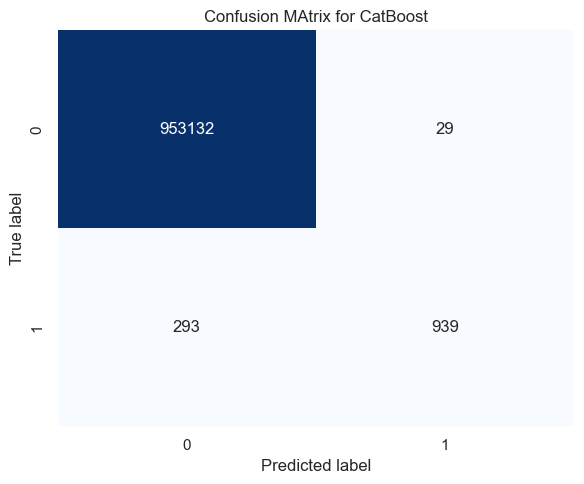

In [52]:
plot_confusion_matrix(y_test, cb_pred_test, title='Confusion MAtrix for CatBoost')

### LightBGM

In [53]:
from lightgbm import LGBMClassifier

In [54]:
lgbm = LGBMClassifier(n_estimators=1000,
                     learning_rate=0.05,
                     max_depth=5,
                     class_weight='balanced',
                     n_jobs=-1,
                     verbosity = -1)

lgbm_pred_test, lgbm_train_df, lgbm_test_df = fit_and_evaluate_model(lgbm,
                                                                  X_train=X_train,
                                                                  y_train=y_train,
                                                                  X_test=X_test,
                                                                  y_test=y_test,
                                                                 X_val=X_val,
                                                                 y_val=y_val)

In [55]:
lgbm_train_df

,Training Accuracy,Training Precision,Training Recall,Training F1 Score,Training ROC AUC Score
0,0.998694,0.49706,1.0,0.664049,0.99997


In [56]:
lgbm_test_df

,Testing Accuracy,Testing Precision,Testing Recall,Testing F1 Score,Testing ROC AUC Score
0,0.998634,0.485507,0.978896,0.649085,0.999541


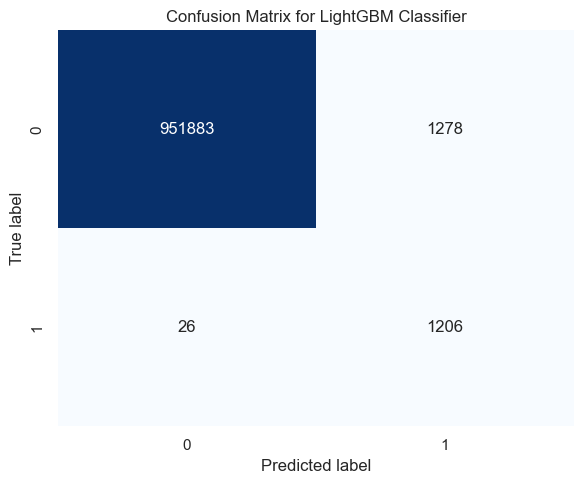

In [57]:
plot_confusion_matrix(y_test, lgbm_pred_test, title='Confusion Matrix for LightGBM Classifier')

* **Extra Trees Classifier** turned out to be the best model with the highest F1 Score

# Unsupervised Learning

### Isolation Forest

In [58]:
from sklearn.ensemble import IsolationForest

In [59]:
mask = (X['CASH_OUT'] == 1) | (X['TRANSFER'] == 1)
X_subset = X[mask]
y_subset = y[mask]

In [60]:
len(X_subset), len(y_subset)

(2770409, 2770409)

In [61]:
frac_fraud = len(y_subset[y_subset==1])/len(y_subset)
len(y_subset[y_subset==1]), frac_fraud

(8213, 0.002964544224336551)

In [62]:
np.random.seed (42)

iso_forest = IsolationForest(
    n_estimators=200,
    contamination=frac_fraud,
    random_state=42
)

iso_forest.fit(X_subset)

,n_estimators,200
,max_samples,'auto'
,contamination,0.002964544224336551
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,42
,verbose,0
,warm_start,False


In [63]:
X_subset['fraud_test'] = iso_forest.predict(X_subset)
X_subset['probably_fraud'] = X_subset['fraud_test'] == -1

C:\Users\Sadat Iqbal\AppData\Local\Temp\ipykernel_8696\1439168319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_subset['fraud_test'] = iso_forest.predict(X_subset)
C:\Users\Sadat Iqbal\AppData\Local\Temp\ipykernel_8696\1439168319.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_subset['probably_fraud'] = X_subset['fraud_test'] == -1


In [64]:
X_subset['probably_fraud'].value_counts()

probably_fraud
False    2762209
True        8200
Name: count, dtype: int64

In [65]:
X_subset.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_OUT,DEBIT,PAYMENT,TRANSFER,fraud_test,probably_fraud
2,181.00,181.0,0.0,0.0,0.00,0,0,0,1,1,False
3,181.00,181.0,0.0,21182.0,0.00,1,0,0,0,1,False
15,229133.94,15325.0,0.0,5083.0,51513.44,1,0,0,0,1,False
19,215310.30,705.0,0.0,22425.0,0.00,0,0,0,1,1,False
24,311685.89,10835.0,0.0,6267.0,2719172.89,0,0,0,1,1,False


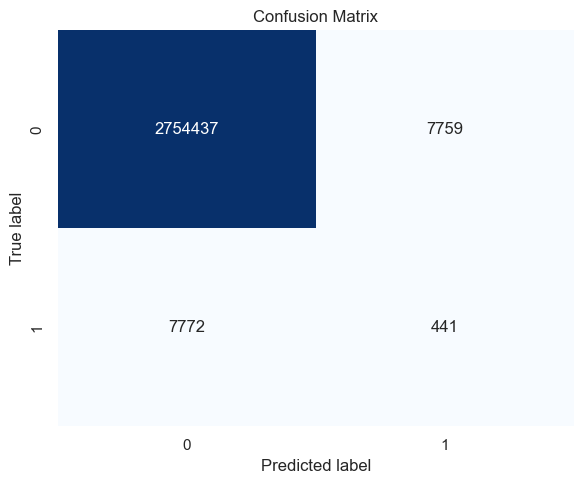

In [66]:
plot_confusion_matrix(y_subset, X_subset['probably_fraud'].astype(int))

In [67]:
iso_forest_result = pd.DataFrame(classification_report(y_subset, X_subset['probably_fraud'].astype(int), output_dict=True)).T
iso_forest_result

,precision,recall,f1-score,support
0,0.997186,0.997191,0.997189,2.762196e+06
1,0.053780,0.053695,0.053738,8.213000e+03
accuracy,0.994394,0.994394,0.994394,9.943940e-01
macro avg,0.525483,0.525443,0.525463,2.770409e+06
weighted avg,0.994390,0.994394,0.994392,2.770409e+06


* Even though `Isolation Forest` is known for its capability to separate out anomalies, noisy data can hinder its ability to learn. Thus it showed inferior capability to detect fraudulent transactions compared to Supervised Learning algorithms

# SHAP Analysis

In [68]:
import shap

In [69]:
mask = (X_test['CASH_OUT'] == 1) | (X_test['TRANSFER'] == 1)
X_test_subset = X_test[mask]
len(X_test_subset)

415305

In [70]:
y_test_subset = y_test[mask]
len(y_test_subset)

415305

The data is too big for SHAP to process. So we need to work with a subset

In [78]:
from sklearn.model_selection import train_test_split

X_test_sample, _, y_test_sample, _ = train_test_split(
    X_test_subset, y_test_subset, 
    train_size=10000, 
    stratify=y_test_subset,
    random_state=42
)

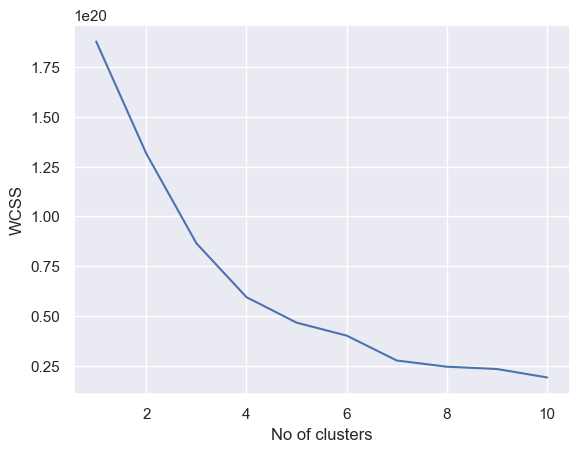

In [80]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

plt.plot(list(range(1,11)), wcss)
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show();

In [81]:
explainer = shap.KernelExplainer(et.predict, shap.kmeans(X_train,4))
shap_values = explainer.shap_values(X_test_sample)

  0%|          | 0/10000 [00:00<?, ?it/s]

C:\Users\Sadat Iqbal\AppData\Local\Temp\ipykernel_8696\365589492.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test_sample, feature_names=X.columns)


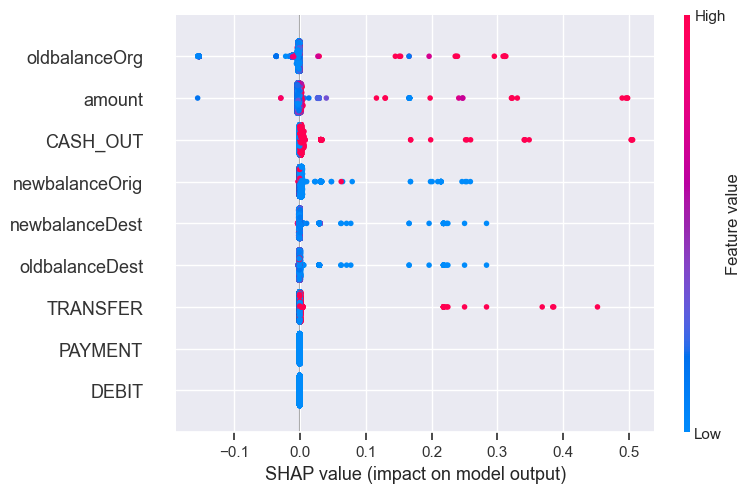

In [82]:
shap.summary_plot(shap_values, X_test_sample, feature_names=X.columns)

* `olBalanceOrg` seems to be the primary prediction of fraudulent transactions with the `amount` being the close second as seen in the EDA section (fraudulent transaction amount were generally higher)
* `CASHOUT` seems to be the most problematic channel and requires close monitoring